<a href="https://colab.research.google.com/github/rodrigosouza07/Dashboards/blob/master/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
analise = pd.read_excel('analiseloja3.xlsx')
analise.head()

,idsubproduto,descrcomproduto,descrsecao,descrgrupo,descrsubgrupo,idoperacao,descroperacao,qtdproduto,valtotliquido
0,101774,B.,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,9,605
1,101771,PATINHO BOV KG,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,1,502
2,32808,ASSADEIRA DE ALUMINIO 7.000ML QUAD D-70 WYDA,BAZAR GERAL + TEXTIL,ALUMINIOS,ASSADEIRAS/FORMAS,1050,Baixa para uso e consumo,3,0
3,24640,CARVAO,BAZAR GERAL + TEXTIL,CAMPING E PESCA,CARVAO,1050,Baixa para uso e consumo,2,0
4,106797,GUAR DE PAPEL SCALA 22X20CM 50UN,BAZAR GERAL + TEXTIL,DESCARTAVEIS,GUARDANAPOS,1050,Baixa para uso e consumo,1,0


In [3]:
analise = analise.rename(columns={'idsubproduto': 'cod', 'descrcomproduto': 'descricao', 'descrsecao': 'secao', 'descrgrupo': 'grupo', 'descrsubgrupo': 'subgrupo', 'qtdproduto': 'quantidade', 'valtotliquido': 'valor total liquido'})
analise.head()

,cod,descricao,secao,grupo,subgrupo,idoperacao,descroperacao,quantidade,valor total liquido
0,101774,B.,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,9,605
1,101771,PATINHO BOV KG,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,1,502
2,32808,ASSADEIRA DE ALUMINIO 7.000ML QUAD D-70 WYDA,BAZAR GERAL + TEXTIL,ALUMINIOS,ASSADEIRAS/FORMAS,1050,Baixa para uso e consumo,3,0
3,24640,CARVAO,BAZAR GERAL + TEXTIL,CAMPING E PESCA,CARVAO,1050,Baixa para uso e consumo,2,0
4,106797,GUAR DE PAPEL SCALA 22X20CM 50UN,BAZAR GERAL + TEXTIL,DESCARTAVEIS,GUARDANAPOS,1050,Baixa para uso e consumo,1,0


In [4]:
analise.groupby('secao')['quantidade'].sum().sort_values(ascending=False)


,quantidade
secao,
MATERIAIS PARA USO E CONSUMO,543
PADARIA,295
LIMPEZA,188
BEBIDAS,129
MERCEARIA SECA,112
MERCEARIA DOCE,72
BAZAR GERAL + TEXTIL,58
PERFUMARIA,25
MERCEARIA SALGADA,24


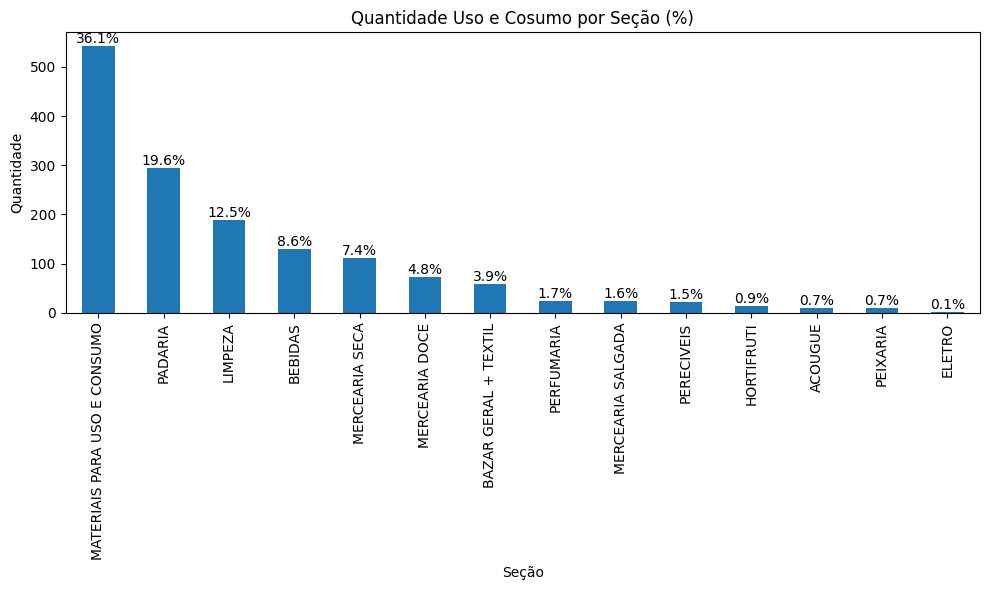

In [5]:
ax = analise.groupby('secao')['quantidade'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

# Adiciona porcentagem em cada barra
total = analise['quantidade'].sum()
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Cosumo por Seção (%)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1775442938.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


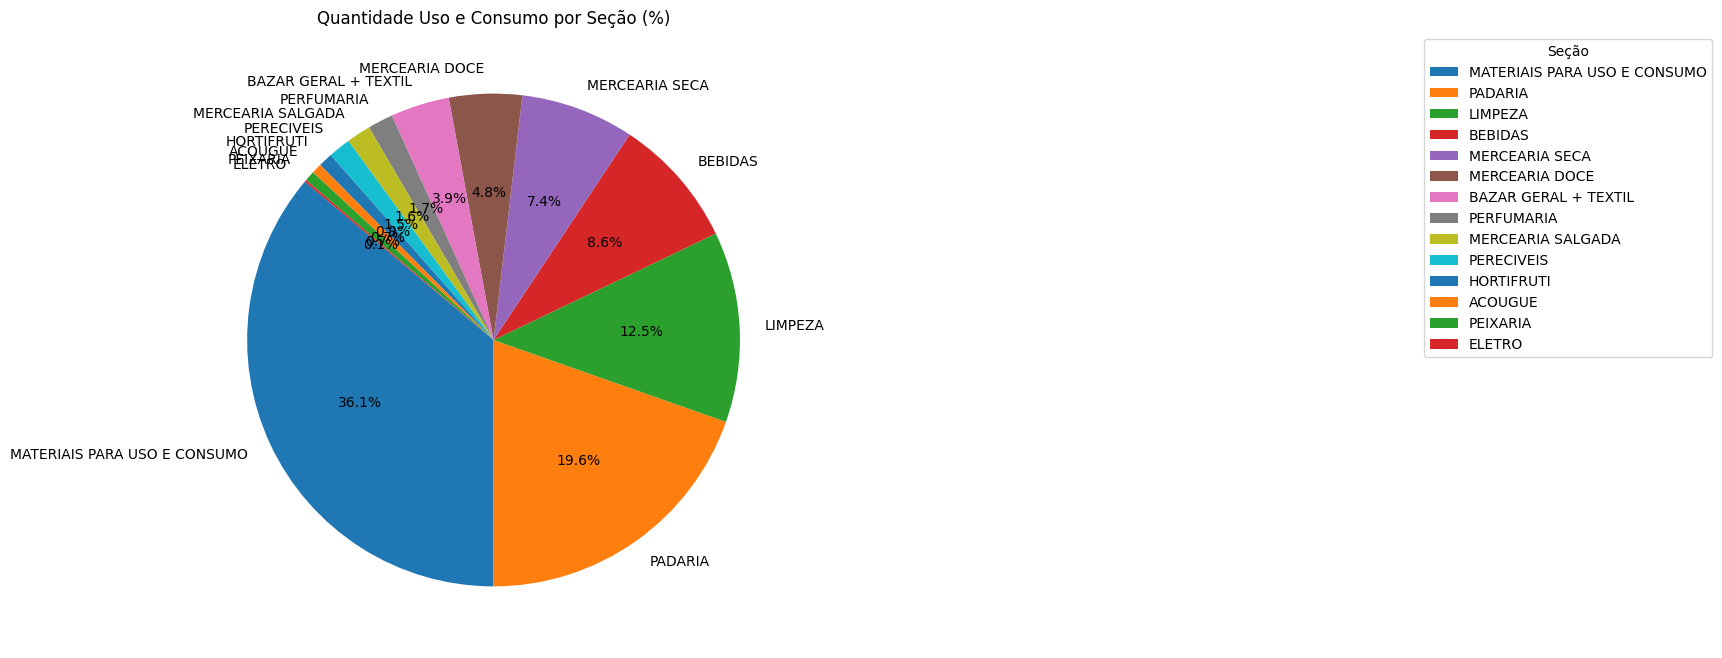

In [6]:
secao_quantidade = analise.groupby('secao')['quantidade'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(secao_quantidade, labels=secao_quantidade.index, autopct='%1.1f%%', startangle=140)
plt.title('Quantidade Uso e Consumo por Seção (%)')
plt.legend(title='Seção', bbox_to_anchor=(2, 1), loc='upper left')
plt.tight_layout()
plt.show()

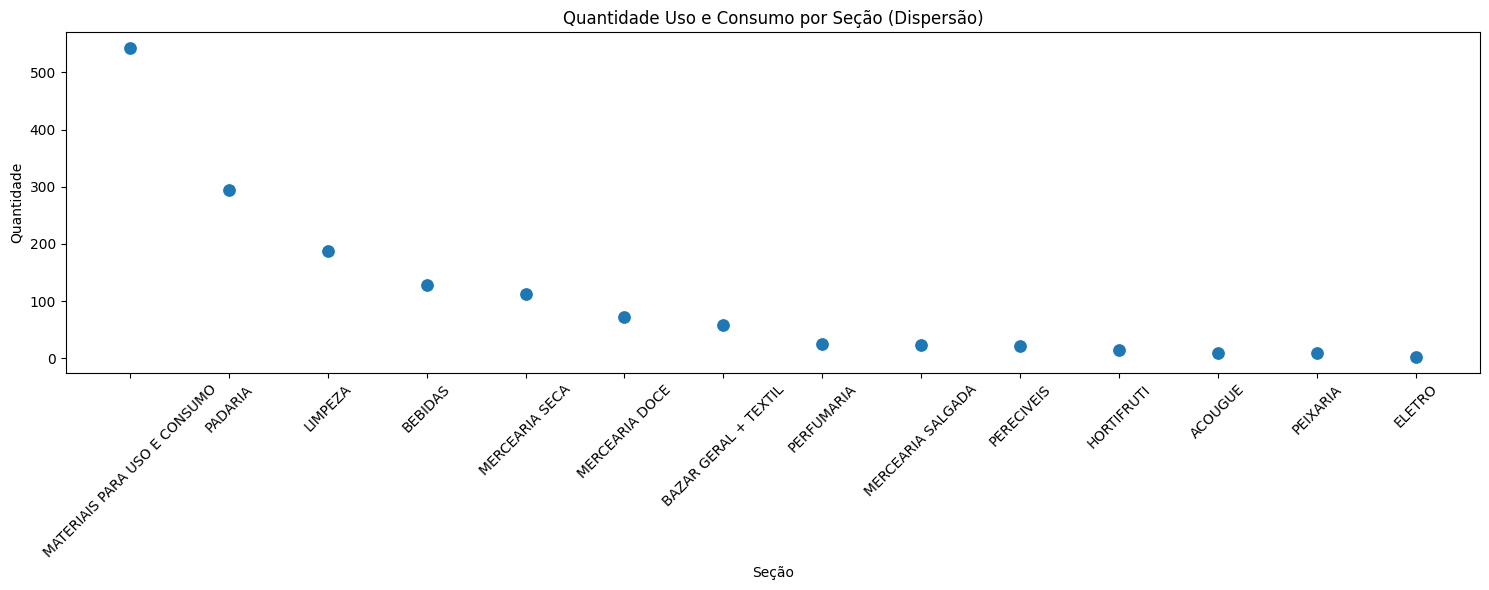

In [7]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=secao_quantidade.index, y=secao_quantidade.values, s=100)
plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Consumo por Seção (Dispersão)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3587484899.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


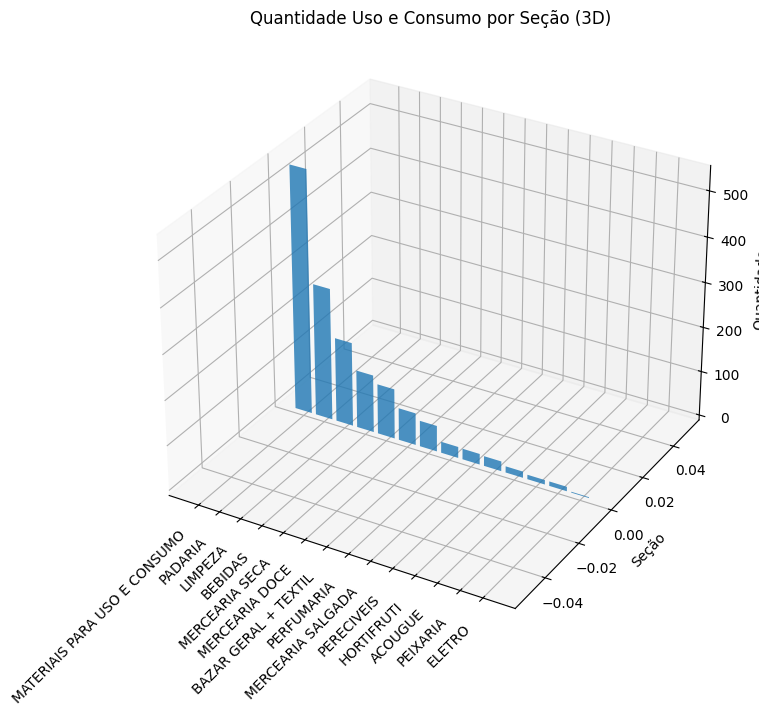

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax3d = fig.add_subplot(111, projection='3d')

x = range(len(secao_quantidade.index))
y = secao_quantidade.values
z = [0] * len(x)

ax3d.bar(x, y, zs=0, zdir='y', alpha=0.8)

ax3d.set_xticks(x)
ax3d.set_xticklabels(secao_quantidade.index, rotation=45, ha='right')
ax3d.set_ylabel('Seção')
ax3d.set_zlabel('Quantidade')
ax3d.set_title('Quantidade Uso e Consumo por Seção (3D)')

plt.tight_layout()
plt.show()